<a href="https://colab.research.google.com/github/ingridmidory/TDA-/blob/main/ProteinBinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo 2: El estudio estructural de la proteína de unión de maltosa.

Kovacev-Nikolic, V., Bubenik, P., Nikoli´c, D., and Heo, G. (2016). Using persistent homology and dynamical distances
to analyze protein binding. Statistical applications in genetics and molecular biology, 15(1):19–38.

La proteína de unión de maltosa (MBP) es una proteína esencial de Escherichia coli, encargada del catabolismo eficiente de maltodextrinas. Está constituída por 370 residuos de aminoácidos en una estructura dinámica que puede ser modelada en un instante por 370 puntos en $R^{3}$. Se puede presentar con una estructura abierta o cerrada.

![title](f34.jpg)

Usando cristalografía de rayos X, se pueden obtener las coordenadas de los 370 puntos correspondientes a los residuos de aminoácidos de una configuración específica. Se analizaron 14 configuraciones de MBP (7 correspondientes a una estructura abierta y 7 cerradas). 

In [1]:
import numpy as np
import gudhi as gd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: ignored

Dada una matríz de correlación $C$ cuya entrada $C_{i,j}$ representa la correlación entre los residuos de aminoácidos $i$ y $j$, se define la matíz de distancia dinámica (en realidad, es una semimétrica), cuyas entradas son $D_{i,j}=1-|C_{i,j}|$.
En seguida, se grafica la matríz de correlación entre los 370 residuos de aminoácidos de una de las estructuras cerradas de MBP.

In [2]:
corr_protein_1 = pd.read_csv("1anf.corr_1.txt", header = None, delim_whitespace = True)
plt.matshow(corr_protein_1.corr())
plt.show()

NameError: ignored

Construimos el complejo de Vietoris-Rips usando la matríz de correlación entre los residuos de aminoácidos y calculamos la persistencia.

In [ ]:
dist_protein_1 = 1-np.abs(corr_protein_1.values)
rips_complex_1 = gd.RipsComplex(distance_matrix = dist_protein_1, max_edge_length = 1.1)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension = 2)
diag_1 = simplex_tree_1.persistence()

In [ ]:
print("dimensión=",simplex_tree_1.dimension())
print("num_simplejos=", simplex_tree_1.num_simplices())
print("num_vertices=", simplex_tree_1.num_vertices())

dimensión= 2
num_simplejos= 8442475
num_vertices= 370


Graficamos el diagrama de persistencia y de código de barras para esta configuración de MBP.

<AxesSubplot:title={'center':'Persistence barcode'}>

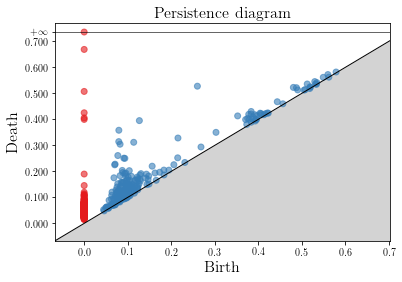

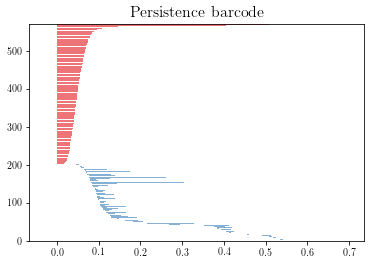

In [ ]:
gd.plot_persistence_diagram(diag_1)
gd.plot_persistence_barcode(diag_1)

En los siguientes cuadros se calculan las matrices de correlación, diagramas de persistencia y código de barras para otras tres configuraciones de MBP, una cerrada: 1fqc, y dos abiertas: 1ez9 y 1fqa.

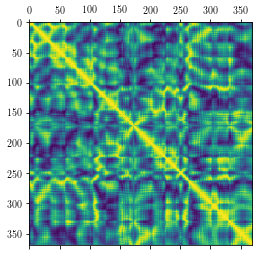

<AxesSubplot:title={'center':'Persistence barcode'}>

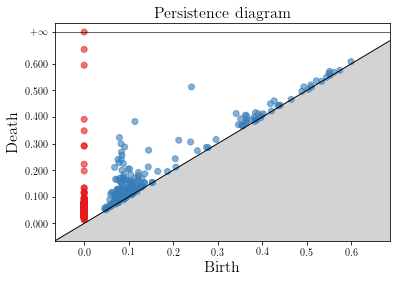

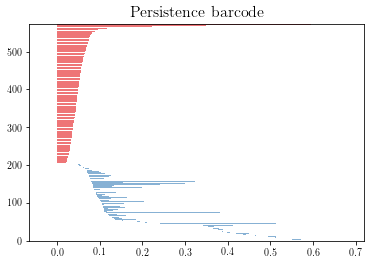

In [ ]:
corr_protein_2 = pd.read_csv("1fqc.corr_2.txt", header = None, delim_whitespace = True)
dist_protein_2 = 1-np.abs(corr_protein_2.values)
rips_complex_2 = gd.RipsComplex(distance_matrix = dist_protein_2, max_edge_length = 1.1)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension = 2)
diag_2 = simplex_tree_2.persistence()
plt.matshow(corr_protein_2.corr())
plt.show()
gd.plot_persistence_diagram(diag_2)
gd.plot_persistence_barcode(diag_2)

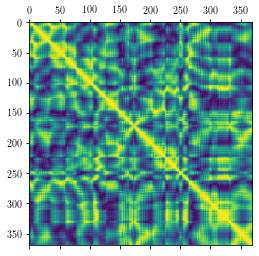

<AxesSubplot:title={'center':'Persistence barcode'}>

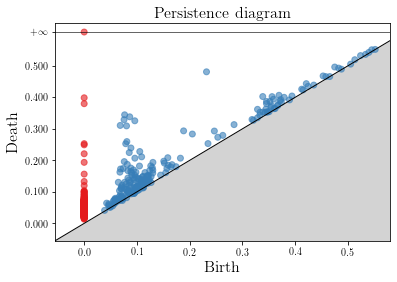

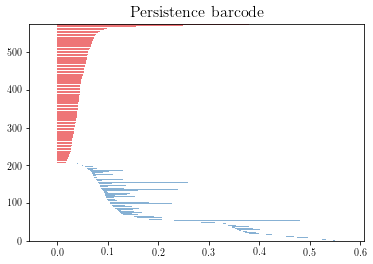

In [ ]:
corr_protein_3 = pd.read_csv("1ez9.corr_1.txt", header = None, delim_whitespace = True)
dist_protein_3 = 1-np.abs(corr_protein_3.values)
rips_complex_3 = gd.RipsComplex(distance_matrix = dist_protein_3, max_edge_length = 1.1)
simplex_tree_3 = rips_complex_3.create_simplex_tree(max_dimension = 2)
diag_3 = simplex_tree_3.persistence()
plt.matshow(corr_protein_3.corr())
plt.show()
gd.plot_persistence_diagram(diag_3)
gd.plot_persistence_barcode(diag_3)

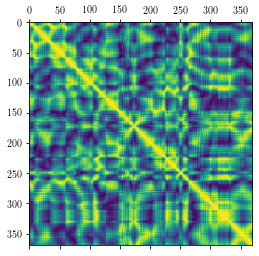

<AxesSubplot:title={'center':'Persistence barcode'}>

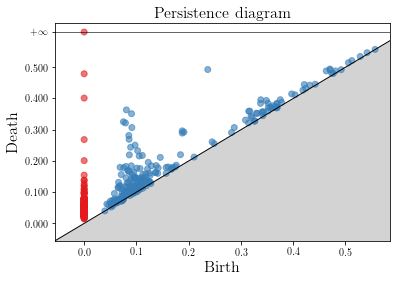

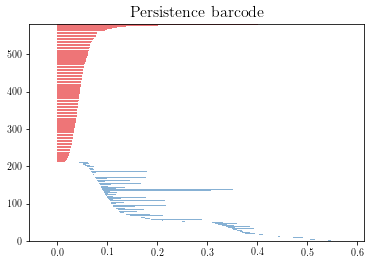

In [ ]:
corr_protein_4 = pd.read_csv("1fqa.corr_2.txt", header = None, delim_whitespace = True)
dist_protein_4 = 1-np.abs(corr_protein_4.values)
rips_complex_4 = gd.RipsComplex(distance_matrix = dist_protein_4, max_edge_length = 1.1)
simplex_tree_4 = rips_complex_4.create_simplex_tree(max_dimension = 2)
diag_4 = simplex_tree_4.persistence()
plt.matshow(corr_protein_4.corr())
plt.show()
gd.plot_persistence_diagram(diag_4)
gd.plot_persistence_barcode(diag_4)

Al calcular la distancia 'bottleneck' entre los diagramas de persistencia de las cuatro configuraciones de MBP analizadas antes y en dimensiones 0 y 1, notamos que dicha distancia es menor entre las configuraciones que corresponden al mismo tipo de configuración (abierta y cerrada),

In [ ]:
interv10 = simplex_tree_1.persistence_intervals_in_dimension(0)
interv20 = simplex_tree_2.persistence_intervals_in_dimension(0)
interv30 = simplex_tree_3.persistence_intervals_in_dimension(0)
interv40 = simplex_tree_4.persistence_intervals_in_dimension(0)
print('Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 2',gd.bottleneck_distance(interv10,interv20))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 3',gd.bottleneck_distance(interv10,interv30))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 4',gd.bottleneck_distance(interv10,interv40))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 3',gd.bottleneck_distance(interv20,interv30))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 4',gd.bottleneck_distance(interv20,interv40))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 3 y 4',gd.bottleneck_distance(interv30,interv40))


Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 2 0.10767523999999995
Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 3 0.27012236999999995
Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 4 0.20270489000000003
Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 3 0.2555875699999999
Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 4 0.19339696000000006
Distancia Bottleneck en dimensión 0 entre los diagramas 3 y 4 0.08062446000000001


In [ ]:
interv11 = simplex_tree_1.persistence_intervals_in_dimension(1)
interv21 = simplex_tree_2.persistence_intervals_in_dimension(1)
interv31 = simplex_tree_3.persistence_intervals_in_dimension(1)
interv41 = simplex_tree_4.persistence_intervals_in_dimension(1)
print('Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 2',gd.bottleneck_distance(interv11,interv21))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 3',gd.bottleneck_distance(interv11,interv31))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 4',gd.bottleneck_distance(interv11,interv41))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 3',gd.bottleneck_distance(interv21,interv31))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 4',gd.bottleneck_distance(interv21,interv41))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 3 y 4',gd.bottleneck_distance(interv31,interv41))

Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 2 0.03666406
Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 3 0.05052142999999998
Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 4 0.050692245000000025
Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 3 0.05050597000000001
Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 4 0.045887270000000036
Distancia Bottleneck en dimensión 1 entre los diagramas 3 y 4 0.04375180000000001


Por último, se construyen los 'paisajes de persistencia' para los diagramas de persistencia antes calculados. 

![title](land.jpg)

In [ ]:
#! pip install persim
import persim
import gudhi.representations

In [ ]:
Ls = gd.representations.Landscape(resolution=1000)
L = Ls.fit_transform([simplex_tree_1.persistence_intervals_in_dimension(1)])

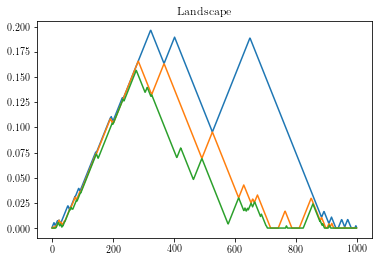

In [ ]:
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.title("Landscape")
plt.show()

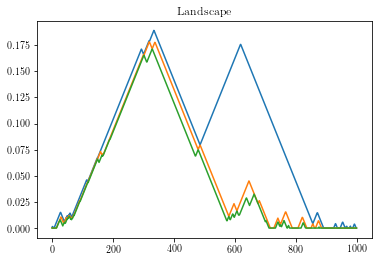

In [ ]:
Ls = gd.representations.Landscape(resolution=1000)
L = Ls.fit_transform([simplex_tree_3.persistence_intervals_in_dimension(1)])
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.title("Landscape")
plt.show()

Al promediar los diagramas de persistencia de las 7 estructuras de MBP cerradas y las 7 abiertas se aprecia una diferencia.

![title](landscapes.jpg)